In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the data
players = pd.read_csv("player_stats.csv")
teams = pd.read_csv("team_data.csv")
world_cups = pd.read_csv("world_cups.csv")

In [7]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        680 non-null    object 
 1   position      680 non-null    object 
 2   team          680 non-null    object 
 3   age           680 non-null    object 
 4   club          679 non-null    object 
 5   birth_year    680 non-null    int64  
 6   games         680 non-null    int64  
 7   games_starts  680 non-null    int64  
 8   minutes       680 non-null    int64  
 9   minutes_90s   680 non-null    float64
 10  goals         680 non-null    int64  
 11  assists       680 non-null    int64  
 12  goals_pens    680 non-null    int64  
 13  pens_made     680 non-null    int64  
 14  pens_att      680 non-null    int64  
 15  cards_yellow  680 non-null    int64  
 16  cards_red     680 non-null    int64  
dtypes: float64(1), int64(11), object(5)
memory usage: 90.4+ KB


In [9]:
#Player Performance Evaluation

# Calculate goals per match
players['Goals_per_match'] = players['goals'] / players['games']

# Display top scorers based on goals per match
top_scorers = players.sort_values(by='Goals_per_match', ascending=False).head(10)
top_scorers[['player', 'Goals_per_match']]


,player,Goals_per_match
377,Kylian Mbappé,1.142857
388,Lionel Messi,1.000000
225,Giorgian De Arrascaeta,1.000000
509,Paik Seung-ho,1.000000
335,Kai Havertz,1.000000
185,Enner Valencia,1.000000
327,Juan Pablo Vargas,1.000000
540,Richarlison,0.750000
229,Gonçalo Ramos,0.750000
109,Bukayo Saka,0.750000


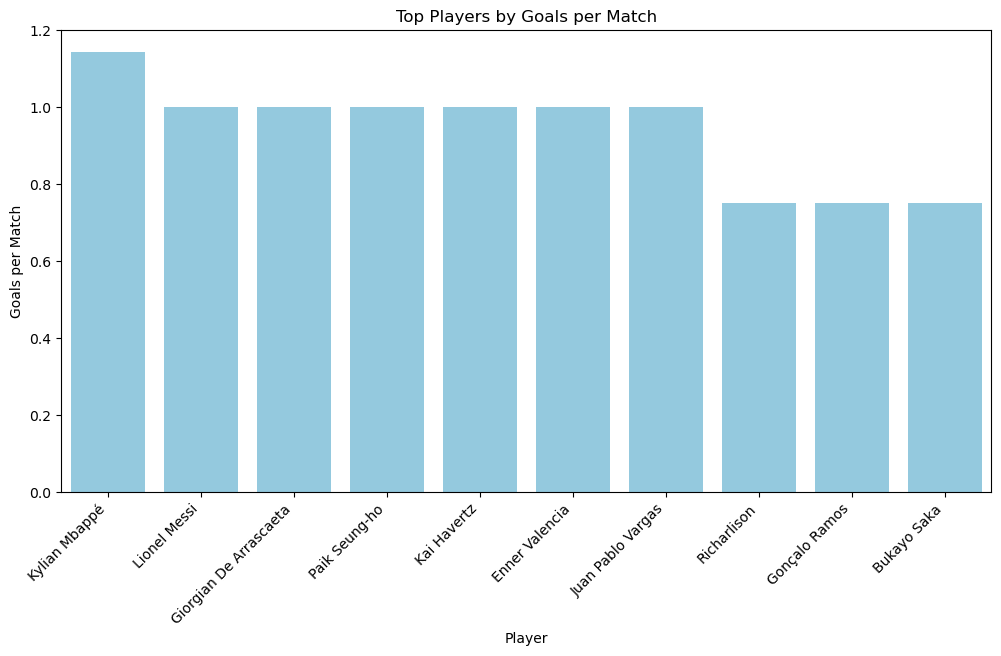

In [17]:
#1. Player Performance Comparison
# Plot for Top Players by Goals per Match
plt.figure(figsize=(12, 6))
sns.barplot(data=top_scorers, x='player', y='Goals_per_match', color='skyblue')
plt.xticks(rotation=45, ha="right")
plt.title("Top Players by Goals per Match")
plt.xlabel("Player")
plt.ylabel("Goals per Match")
plt.show()


In [23]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   team                        32 non-null     object 
 1   players_used                32 non-null     int64  
 2   avg_age                     32 non-null     float64
 3   possession                  32 non-null     float64
 4   games                       32 non-null     int64  
 5   games_starts                32 non-null     int64  
 6   minutes                     32 non-null     int64  
 7   goals                       32 non-null     int64  
 8   assists                     32 non-null     int64  
 9   goals_pens                  32 non-null     int64  
 10  pens_made                   32 non-null     int64  
 11  pens_att                    32 non-null     int64  
 12  cards_yellow                32 non-null     int64  
 13  cards_red                   32 non-nu

C:\Users\rishi\AppData\Local\Temp\ipykernel_14228\2796526155.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_teams, x='team', y='goals', palette='viridis')


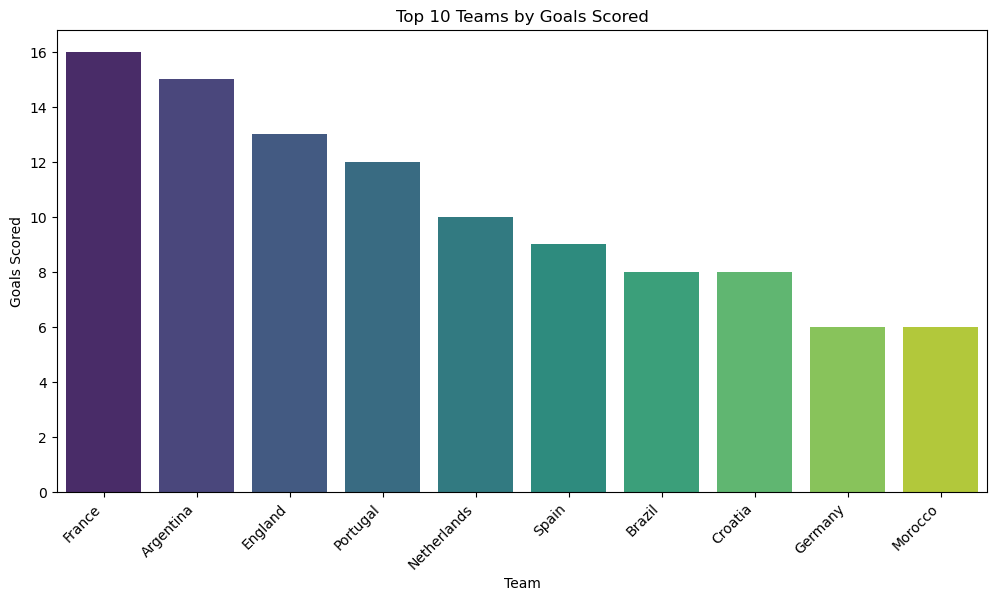

In [35]:
#2. Team Performance 
top_teams = teams[['team', 'goals']].sort_values(by='goals', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_teams, x='team', y='goals', palette='viridis')
plt.xticks(rotation=45, ha="right")
plt.title('Top 10 Teams by Goals Scored')
plt.xlabel('Team')
plt.ylabel('Goals Scored')
plt.show()



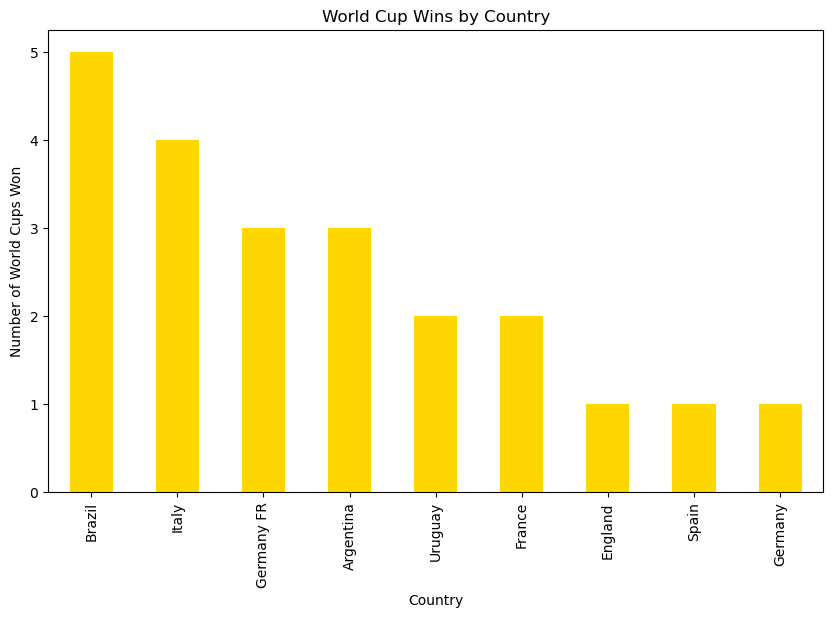

In [57]:
#3. World Cup Wins by Country (Bar Chart)
plt.figure(figsize=(10, 6))
world_cup_wins.plot(kind='bar', color='gold')
plt.title("World Cup Wins by Country")
plt.xlabel("Country")
plt.ylabel("Number of World Cups Won")
plt.show()


C:\Users\rishi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


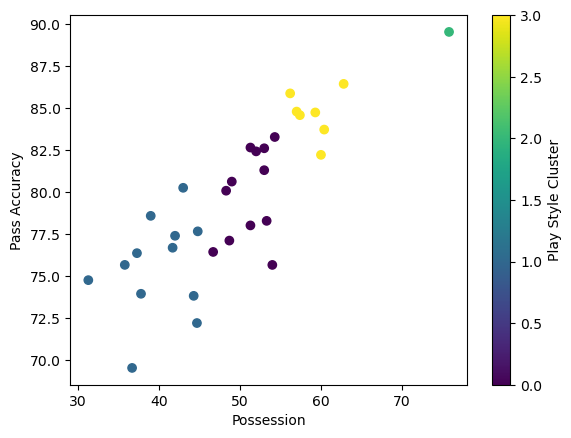

In [61]:
#Improved Tactical Understanding

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate Pass Accuracy
teams['Pass_Accuracy'] = (teams['passes_completed'] / teams['passes']) * 100

# Apply clustering (excluding Goals_Conceded if not available)
kmeans = KMeans(n_clusters=4, random_state=0).fit(teams[['possession', 'Pass_Accuracy']])
teams['Play_Style'] = kmeans.labels_

# Visualize clusters
plt.scatter(teams['possession'], teams['Pass_Accuracy'], c=teams['Play_Style'], cmap='viridis')
plt.xlabel('Possession')
plt.ylabel('Pass Accuracy')
plt.colorbar(label='Play Style Cluster')
plt.show()


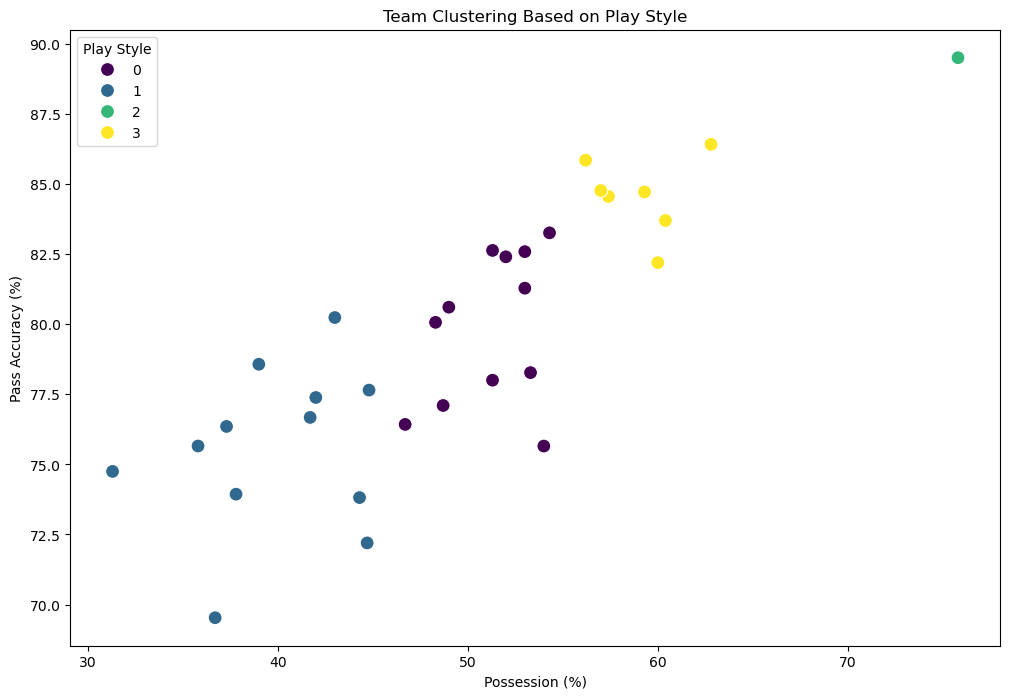

In [67]:
#4. Team Play Styles (Clustering Result)
# Calculate Pass Accuracy if not already calculated
teams['Pass_Accuracy'] = (teams['passes_completed'] / teams['passes']) * 100

# Assuming you have already assigned a `Play_Style` using KMeans clustering
plt.figure(figsize=(12, 8))
sns.scatterplot(data=teams, x='possession', y='Pass_Accuracy', hue='Play_Style', palette='viridis', s=100)
plt.title("Team Clustering Based on Play Style")
plt.xlabel("Possession (%)")
plt.ylabel("Pass Accuracy (%)")
plt.legend(title='Play Style')
plt.show()


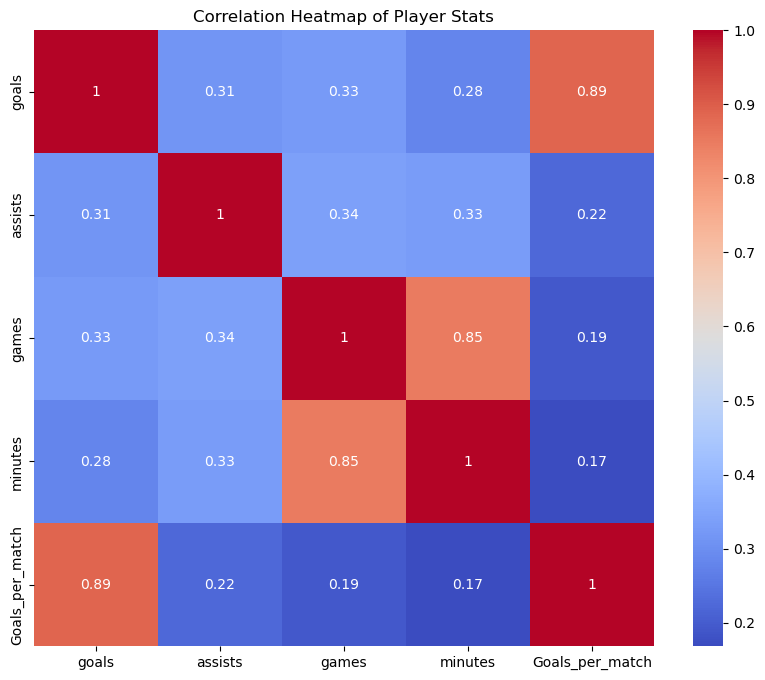

In [79]:
#5. Correlation Heatmap for Player Stats

plt.figure(figsize=(10, 8))
correlation_matrix = players[['goals', 'assists', 'games', 'minutes', 'Goals_per_match']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Player Stats")
plt.show()
